In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
# rc('text', usetex=True)

sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("bright")

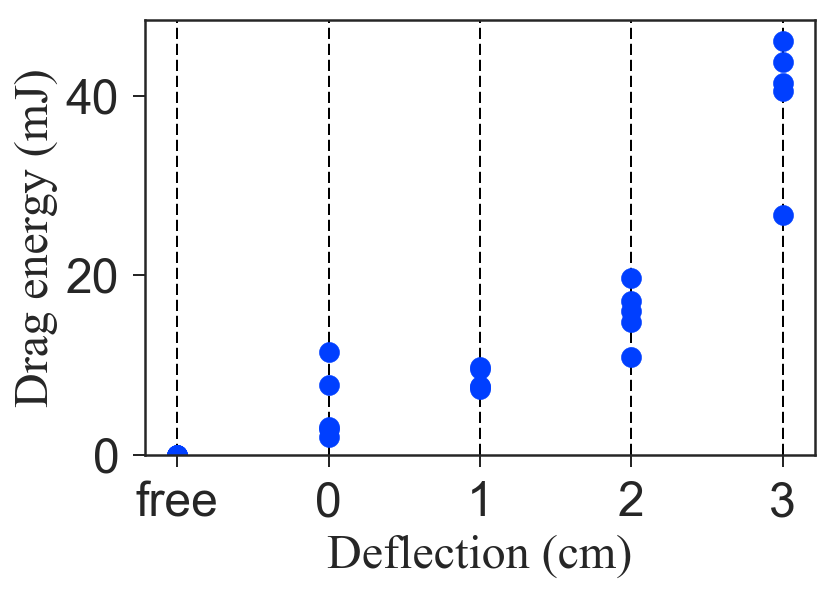

In [2]:
# import plotly.plotly as py
# import plotly.tools as tls

# figure, axarr = plt.subplots(1) 

#Drag Energy Values Per Experiment
#[4,6,8,10,14]cms
#These are in milli Joules!!!!!
# y = [[43.7517281399,40.5095916734,46.0396065548,41.3447699641,26.7173180728],
#      [16.0091360348,17.1934198813,19.6689776828,10.963293453,14.7849611848],
#      [7.67721674383,9.54039749662,7.53230578126,7.31788106526,9.78851015352],
#      [1.9878490957,7.79337248744,2.89737072701,11.512361768,3.09771914392],
#      [0.000544984373971,0.0218416287489,0.0171017898361,0.0171689905565]]
y=[[0.000544984373971,0.0218416287489,0.0171017898361,0.0171689905565],
  [1.9878490957,7.79337248744,2.89737072701,11.512361768,3.09771914392],
  [7.67721674383,9.54039749662,7.53230578126,7.31788106526,9.78851015352],
  [16.0091360348,17.1934198813,19.6689776828,10.963293453,14.7849611848],
  [43.7517281399,40.5095916734,46.0396065548,41.3447699641,26.7173180728]]

#here are old drag energy values for free channel, delete after done..
# [2.54731008612,1.52608656469,2.78558680355,1.42638075052,3.23267274691]
# x = [[4]*5,[6]*5,[8]*5,[10]*5, [14]*4]
x = [[-1]*4,[0]*5,[1]*5,[2]*5,[3]*5]
# my_xticks = ["4","6","8","10","14"]
my_xticks=["free","0","1", "2", "3"]
y = reduce(lambda a,b: a+b, y)
x = reduce(lambda a,b: a+b, x)
# print my_xticks
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y,s=100)
# ax.set_xticks((4,6,8,10,12))
ax.set_xticks((-1,0,1,2,3))
ax.set_xticklabels(my_xticks)

ax.tick_params(axis='both', which='both', labelsize=24)
# ax.ylabel('Drag Energy (mJ)')
# ax.xlabel('Channel Width (cm)')
# ax.spines['left'].set_position('zero')
# ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.xaxis.grid(True)
fig.set_size_inches((6,4))
xfont = {'fontname':'Times New Roman'}
ax.set_xlabel("Deflection (cm)",fontdict=xfont, fontsize=24)
ax.set_ylabel("Drag energy (mJ)",fontdict=xfont,fontsize=24)
# fig.set_size_inches(,)
plt.show()
# ax.show()